# Google Cloud CMIP6 Public Data: Basic Python Example

This notebooks shows how to query the catalog and load the data using python

In [2]:
%%capture
! pip install --upgrade zarr gcsfs cftime xarray nc-time-axis #netCDF4 esgf-pyclient

from matplotlib import pyplot as plt
import numpy as np; import pandas as pd
import xarray as xr
import zarr; import gcsfs
#from pyesgf.search import SearchConnection
from sklearn.linear_model import LinearRegression

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


## Browse Catalog

The data catatalog is stored as a CSV file. Here we read it with Pandas.

The columns of the dataframe correspond to the CMI6 controlled vocabulary. A beginners' guide to these terms is available in [this document](https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q). 

Here we filter the data to find monthly surface air temperature for historical experiments.

In [3]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#here we filter the data to find monthly surface air temperature for historical experiments.
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas'  & experiment_id == 'historical' ")
#Now we do further filtering to find just the models from NCAR.
df_ta_ncar = df_ta.query('institution_id == "NCAR"')
df_ta_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
33712,CMIP,NCAR,CESM2-FV2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r1i1...,NaN
33832,CMIP,NCAR,CESM2-WACCM-FV2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN
34502,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r1...,NaN
34722,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r2...,NaN
34909,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r3...,NaN
35896,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN
36105,CMIP,NCAR,CESM2,historical,r11i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r11i1p1f...,NaN
36344,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r1i1p1f1...,NaN
36605,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r2i1p1f1...,NaN
36843,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r3i1p1f1...,NaN


## Load Data

Now we will load a single store using gcsfs, zarr, and xarray.

In [4]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta_ncar.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.009
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-27T10:42:54Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/4b164514-1627-4deb-a8d5-93d4c5166d41...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

In [5]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:       

Plot a map from a specific date.

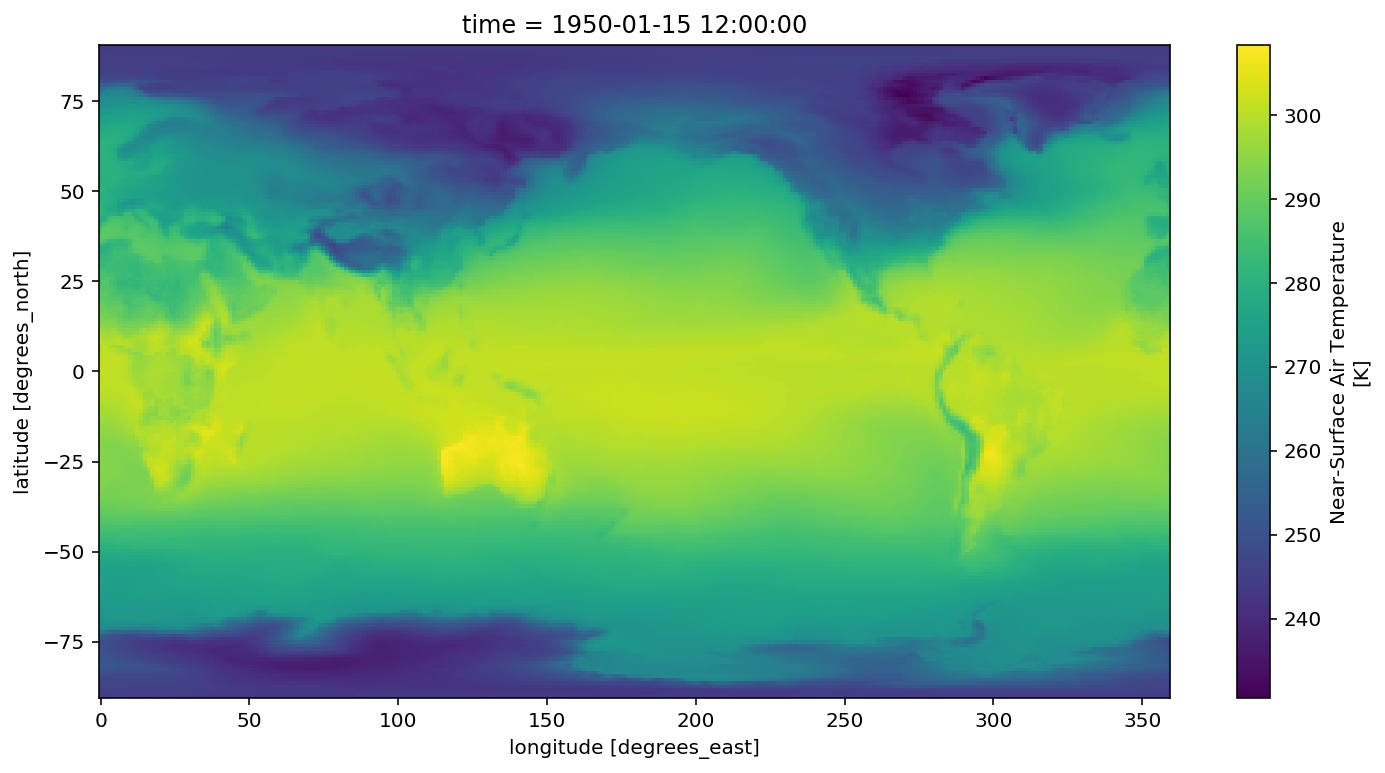

In [6]:
ds.tas.sel(time = '1950-01' ).squeeze().plot()

Create a timeseries of global-average surface air temperature. For this we need the area weighting factor for each gridpoint.

In [0]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2'")

In [8]:
df_area.values

array([['CFMIP', 'NCAR', 'CESM2', 'amip-4xCO2', 'r1i1p1f1', 'fx',
        'areacella', 'gn',
        'gs://cmip6/CFMIP/NCAR/CESM2/amip-4xCO2/r1i1p1f1/fx/areacella/gn/',
        nan],
       ['CFMIP', 'NCAR', 'CESM2', 'amip-future4K', 'r1i1p1f1', 'fx',
        'areacella', 'gn',
        'gs://cmip6/CFMIP/NCAR/CESM2/amip-future4K/r1i1p1f1/fx/areacella/gn/',
        nan],
       ['CFMIP', 'NCAR', 'CESM2', 'amip-m4K', 'r1i1p1f1', 'fx',
        'areacella', 'gn',
        'gs://cmip6/CFMIP/NCAR/CESM2/amip-m4K/r1i1p1f1/fx/areacella/gn/',
        nan],
       ['CFMIP', 'NCAR', 'CESM2', 'amip-p4K', 'r1i1p1f1', 'fx',
        'areacella', 'gn',
        'gs://cmip6/CFMIP/NCAR/CESM2/amip-p4K/r1i1p1f1/fx/areacella/gn/',
        nan],
       ['CFMIP', 'NCAR', 'CESM2', 'aqua-4xCO2', 'r1i1p1f1', 'fx',
        'areacella', 'gn',
        'gs://cmip6/CFMIP/NCAR/CESM2/aqua-4xCO2/r1i1p1f1/fx/areacella/gn/',
        nan],
       ['CFMIP', 'NCAR', 'CESM2', 'aqua-control', 'r1i1p1f1', 'fx',
        'areacella'

In [9]:
df_area.zstore.values

array(['gs://cmip6/CFMIP/NCAR/CESM2/amip-4xCO2/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CFMIP/NCAR/CESM2/amip-future4K/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CFMIP/NCAR/CESM2/amip-m4K/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CFMIP/NCAR/CESM2/amip-p4K/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CFMIP/NCAR/CESM2/aqua-4xCO2/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CFMIP/NCAR/CESM2/aqua-control/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CFMIP/NCAR/CESM2/aqua-p4K/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CMIP/NCAR/CESM2/1pctCO2/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CMIP/NCAR/CESM2/amip/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CMIP/NCAR/CESM2/esm-piControl/r1i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CMIP/NCAR/CESM2/historical/r11i1p1f1/fx/areacella/gn/',
       'gs://cmip6/CMIP/NCAR/CESM2

In [10]:
df_area.shape

(29, 10)

In [11]:
ds_area = xr.open_zarr(gcs.get_mapper(df_area.zstore.values[0]), consolidated=True)
ds_area

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CFMIP
    branch_method:          no parent
    branch_time_in_child:   721970.0
    branch_time_in_parent:  0.0
    case_id:                965
    cesm_casename:          f.e21.FHIST_BGC.f09_f09_mg17.CFMIP-amip-4xCO2.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-03-13T22:41:31Z
    data_specs_version:     01.00.29
    experiment:             Continuation of CFMIP-2 AMIP experiments and CMIP...
    experiment_id:          amip-4xCO2
    forcing_index:          1
    frequency:              fx
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.a...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     no parent
    parent_experiment_id:   no parent
    parent_mip_era:         no parent
    parent_source_id:       no parent
    parent_time_units:      no parent
    parent_variant_label:   no parent
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos land
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AGCM AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               fx
    tracking_id:            hdl:21.14100/35b69461-eb69-4a58-b2f7-413dbf2cd8fe
    variable_id:            areacella
    variant_info:           The same as the amip experiment within DECK, exce...
    variant_label:          r1i1p1f1
    status:                 2019-11-04;created;by nhn2@columbia.edu

compute the globally averaged value. By default the data are loaded lazily, as Dask arrays. Here we trigger computation explicitly.

In [12]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries.load()

<xarray.DataArray (time: 1980)>
array([285.6408 , 285.57397, 286.33856, ..., 288.6992 , 287.76303,
       287.0621 ], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

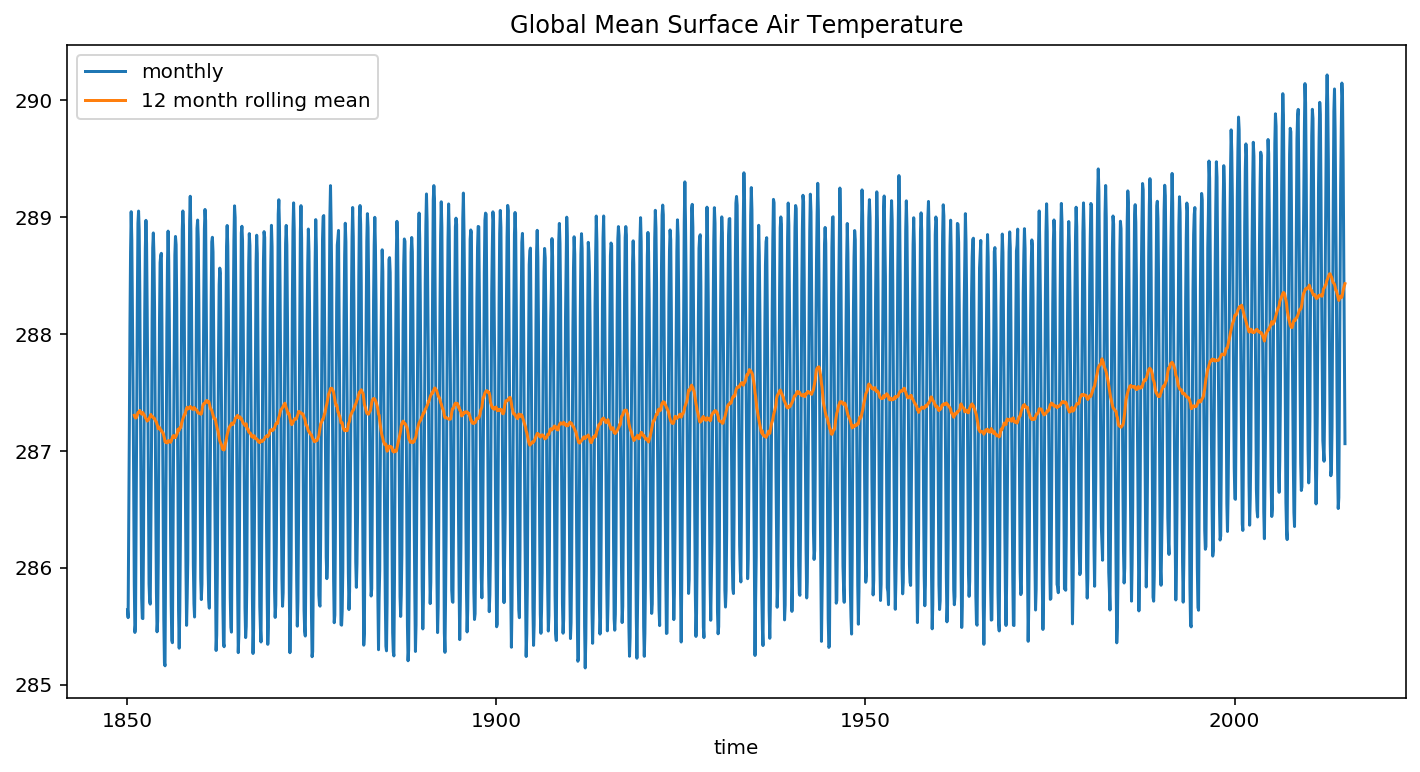

In [13]:
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')

In [14]:
ta_timeseries

<xarray.DataArray (time: 1980)>
array([285.6408 , 285.57397, 286.33856, ..., 288.6992 , 287.76303,
       287.0621 ], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [0]:
ta_timeseries.values

array([285.6408 , 285.57397, 286.33856, ..., 288.6992 , 287.76303,
       287.0621 ], dtype=float32)

# Streamlined pipeline for CMIP-6

In [0]:
# Load array of availible models that do RCP 8.5 and have an area file (to calc temperature)
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_mod = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'ssp585'")
models = df_mod.source_id.unique()
models = list(models)
df_area = df.query("variable_id == 'areacella'")
areas = df_area.source_id.unique()
areas = list(areas)
models = set(models) & set(areas)
# remove this 'MAC' model because it has bad longitude and latitude values
models = ['CESM2','CESM2-WACCM','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR','MRI-ESM2-0']

## Loop though all models and make a big dataframe of all temperatures (global)

In [16]:
allT = pd.DataFrame({'model': [], 'ssp': [], 'year': [], 'mean_tas': []})
years = np.arange(1850,2100,1).astype(int)

df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
for model in models:
    print(model)
    # get area of the grids
    df_area = df.query("variable_id == 'areacella' & source_id == '%s'"%(model))
    ds_area = xr.open_zarr(gcs.get_mapper(df_area.zstore.values[0]), consolidated=True)

    # here we filter the data to find monthly surface air temperature for historical experiments.
    df_ta_h = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'historical' & source_id == '%s'"%(model))
    mapper = gcs.get_mapper(df_ta_h.zstore.values[0])
    ds_h = xr.open_zarr(mapper, consolidated=True)

    # calculate global mean
    total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
    ta_timeseries = (ds_h.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
    # calculate yearly averages and write to numpy array
    ta_hist = ta_timeseries.values
    ta_h = np.zeros(165)
    for i in range(165): ta_h[i] = ta_hist[(i*12):(i*12)+12].mean() 
    
    # loop through all ssps (RCPs) for each availible model
    df_ssp = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & variable_id == 'tas' & source_id == '%s'"%(model))
    ssps = df_ssp.experiment_id.unique()
    for ssp in ssps:
        df_fut = df.query("activity_id=='ScenarioMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == '%s' & source_id == '%s'"%(ssp, model))
        mapper = gcs.get_mapper(df_fut.zstore.values[0])
        ds_fut = xr.open_zarr(mapper, consolidated=True)

        # calculate global mean
        ta_timeseries = (ds_fut.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
        # calculate yearly averages and write to numpy array
        ta_fut = ta_timeseries.values
        ta_f = np.zeros(85)
        for i in range(85): ta_f[i] = ta_fut[(i*12):(i*12)+12].mean() 

        ta = np.concatenate((ta_h, ta_f))
        dftemp = pd.DataFrame({'model': model, 'ssp': ssp, 'year': years, 'mean_tas': ta})
        allT = pd.concat((allT,dftemp))

allT.to_csv('/content/drive/Shared drives/GEOS39650/climate_emulator/data/12_CMIP6_models_global_mean.csv', sep=',', index=False)

CESM2
CESM2-WACCM
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
GFDL-CM4
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
MIROC6
MPI-ESM1-2-HR
MRI-ESM2-0


In [17]:
allT['ssp'].value_counts()

ssp585    3000
ssp245    3000
ssp370    2750
ssp126    2750
ssp119    1750
Name: ssp, dtype: int64

In [18]:
allT['model'].value_counts()

MRI-ESM2-0       1250
CanESM5          1250
IPSL-CM6A-LR     1250
CNRM-ESM2-1      1250
GFDL-ESM4        1250
MIROC-ES2L       1250
MIROC6           1250
CNRM-CM6-1       1000
CESM2-WACCM      1000
MPI-ESM1-2-HR    1000
CESM2            1000
GFDL-CM4          500
Name: model, dtype: int64

In [0]:
counter =0
allT_mod = np.zeros(shape=(1250,4))
for model in ['CESM2','CESM2-WACCM','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR','MRI-ESM2-0']:
  for rcp in ['ssp245','ssp585','ssp126','ssp370','ssp119']:
    allT_mod = allT[allT.model== model]
    allT_mod = allT_mod[allT_mod.ssp==rcp]


In [20]:
allT_mod

,model,ssp,year,mean_tas
0,MRI-ESM2-0,ssp119,1850.0,286.940216
1,MRI-ESM2-0,ssp119,1851.0,286.991943
2,MRI-ESM2-0,ssp119,1852.0,286.911530
3,MRI-ESM2-0,ssp119,1853.0,286.806549
4,MRI-ESM2-0,ssp119,1854.0,286.767242
...,...,...,...,...
245,MRI-ESM2-0,ssp119,2095.0,288.159180
246,MRI-ESM2-0,ssp119,2096.0,288.181885
247,MRI-ESM2-0,ssp119,2097.0,288.063446
248,MRI-ESM2-0,ssp119,2098.0,287.970795


# Regression

In [21]:
# load temperature data
df = pd.read_csv('/content/drive/Shared drives/GEOS39650/climate_emulator/data/12_CMIP6_models_global_mean.csv', sep=',')
df1 = df[df.model == 'MRI-ESM2-0'] #filter for a model
df1 = df1[df1.ssp == 'ssp585']     #filter an RCP
df1.mean_tas

13000    286.940216
13001    286.991943
13002    286.911530
13003    286.806549
13004    286.767242
            ...    
13245    291.359009
13246    291.552704
13247    291.771454
13248    291.462769
13249    291.568451
Name: mean_tas, Length: 250, dtype: float64

In [22]:
df1.columns

Index(['model', 'ssp', 'year', 'mean_tas'], dtype='object')

# check co2 numbers (these numbers are wrong... we want GHG eqivalent values... table needs to be changed)

In [0]:
co2 = np.array([[287.78, 289.916, 291.898, 295.77, 300.064, 302.579, 308.156, 313.601, 320.124, 325.322, 327.921, 337.17, 351.328, 371.945, 395.324, 415.858, 442.38, 469.324, 494.974, 524.967, 562.025, 606.679, 658.827, 715.961, 764.288, 799.868],
                [287.780, 289.916, 291.898, 295.770, 300.064, 302.579, 308.156, 313.601, 320.124, 325.322, 327.921, 337.170, 351.328, 371.945, 395.324, 415.858, 442.353, 471.958, 503.799, 537.235, 569.715, 596.993, 614.770, 621.480, 623.855, 629.592],
                [287.780, 289.916, 291.898, 295.770, 300.064, 302.579, 308.156, 313.601, 320.124, 325.322, 327.921, 337.170, 351.328, 371.945, 395.324, 415.858, 442.761, 470.821, 490.699, 501.433, 503.321, 499.944, 494.224, 487.717, 481.394, 475.193],
                [287.780, 289.916, 291.898, 295.770, 300.064, 302.579, 308.156, 313.601, 320.124, 325.322, 327.921, 337.170, 351.328, 371.945, 395.324, 415.858, 443.065, 482.759, 534.353, 599.343, 683.062, 785.604, 902.529, 1029.936, 1167.748, 1313.451]]).transpose()


In [0]:
x = np.array(pd.DataFrame(co2, columns=['RCP60', 'RCP45', 'RCP26', 'RCP85'], index=np.linspace(1850, 2100, 26)).reindex(np.linspace(1850, 2100, 251)).interpolate(method='cubic'))

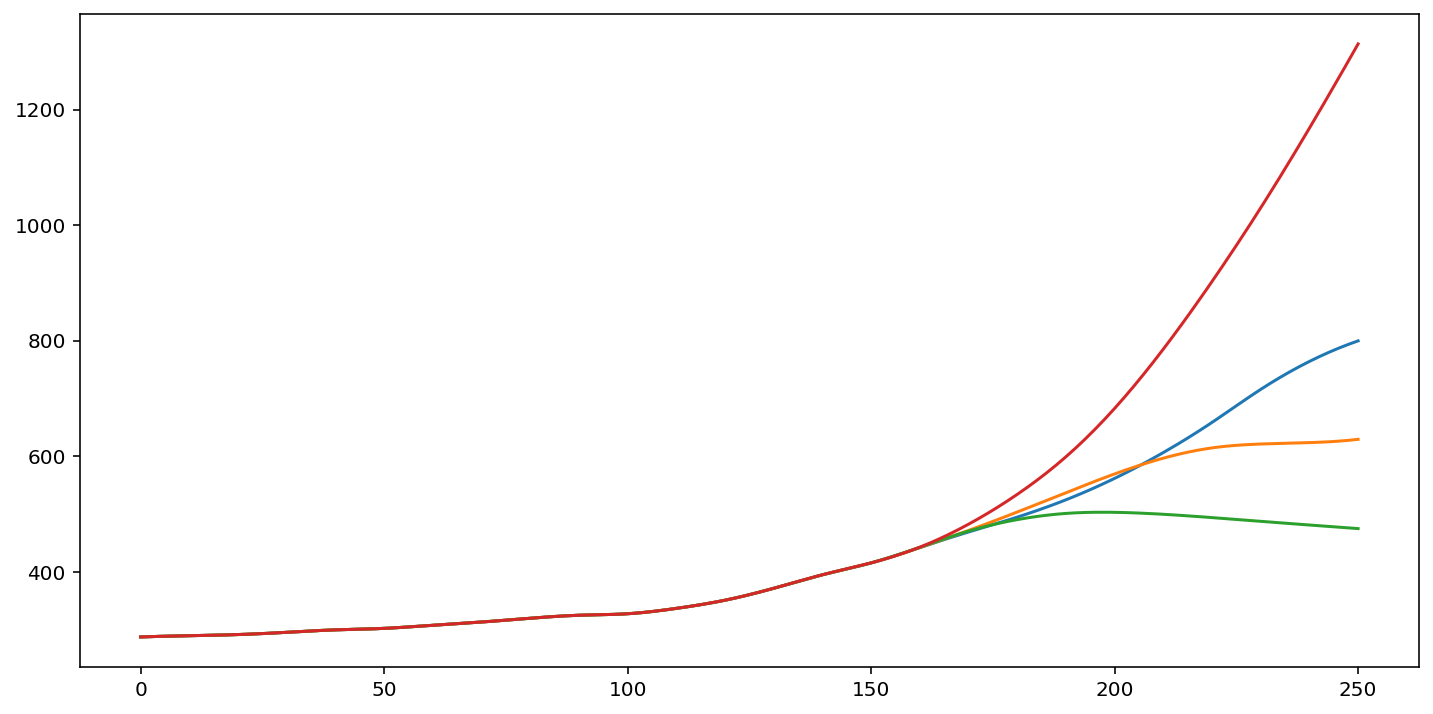

In [25]:
plt.plot(x)

In [0]:
#from sklearn.preprocessing import Imputer
y=list(x)

In [27]:
x.shape

(251, 4)

In [28]:
for col in range(1):
  for num, val in enumerate(x):
    print(x[num][col])

287.78
288.0788580488544
288.35144092438634
288.6004969791873
288.82877456584856
289.03902203696146
289.2339877451175
289.4164200429079
289.5890672829243
289.7546778177578
289.916
290.07578218224216
290.23677271707584
290.4017199570921
290.57337225488254
290.7544779630386
290.9477854341515
291.1560430208127
291.3819990756137
291.62840195114563
291.898
292.19283722217693
292.51214020731067
292.8544311924445
293.21823241462135
293.60206611088444
294.00445451827676
294.4239198738414
294.8589844146214
295.3081703776599
295.77
296.2423009290503
296.7201224536816
297.1978192731302
297.6697460866322
298.130257593424
298.57370849274196
298.9944534838222
299.38684726590105
299.74524453821493
300.064
300.34021806162184
300.58200197796293
300.8002047150352
301.00567923885023
301.20927851541984
301.42185551075596
301.65426319087027
301.9173545217744
302.22198246948045
302.579
302.99599782446234
303.46751763446656
303.98483886672943
304.53924095796725
305.1220033448967
305.7244054642346
306.3377267

In [0]:
xnew = np.zeros_like(x)
rho = 0.8
for j in range(x.shape[1]):
  for i in range(x.shape[0]):
    ks = np.flip(np.arange(0,i))
    rhoa = rho ** ks 
    #print(rhoa.sum())
    xnew[i,j] = (1- rho) * np.sum(rhoa*(np.log((x[0:i,j])/287.780)))

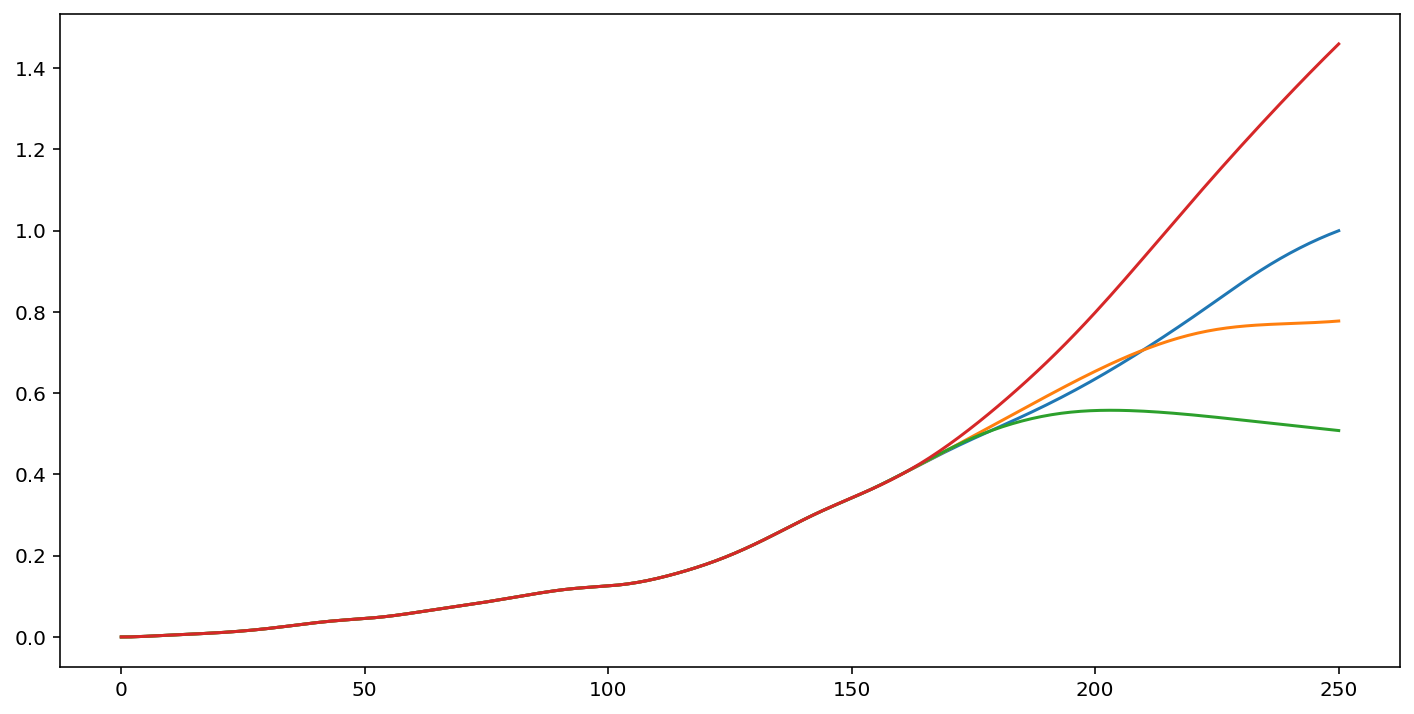

In [30]:
plt.plot(xnew)

In [0]:
xnew

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07591198e-04, 2.07591199e-04, 2.07591198e-04, 2.07591200e-04],
       ...,
       [9.90441430e-01, 7.75905240e-01, 5.10623737e-01, 1.43602300e+00],
       [9.95279537e-01, 7.76735606e-01, 5.09327481e-01, 1.44790180e+00],
       [9.99929918e-01, 7.77666003e-01, 5.08029214e-01, 1.45969412e+00]])

# check log sumation function to calculate past CO2 trajectory


In [0]:
rho = 0.8
x_co2 = np.zeros(shape=(251,4))


for col in range(4):
  counter=0
  while(counter<250):
    for num, val in enumerate(x):
      series = 0
      result = 0
      while(num >=0):
        result += (np.power(rho,num))*(np.log(x[series][col]/287.78))
        series = series +1
        num = num - 1
      result=0.2*result
      x_co2[series-1][col]= result
      counter = counter + 1
    

In [32]:
x_co2

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07591198e-04, 2.07591199e-04, 2.07591198e-04, 2.07591200e-04],
       [5.62816529e-04, 5.62816530e-04, 5.62816529e-04, 5.62816534e-04],
       ...,
       [9.95279537e-01, 7.76735606e-01, 5.09327481e-01, 1.44790180e+00],
       [9.99929918e-01, 7.77666003e-01, 5.08029214e-01, 1.45969412e+00],
       [1.00439402e+00, 7.78707941e-01, 5.06728319e-01, 1.47139870e+00]])

# reshape x and y so that they  are vertical 

np.reshape (250,1)

In [0]:
#m = LinearRegression( normalize = False, fit_intercept = True )
#m.fit(x,Y).coef_

In [0]:
xnew = np.array(pd.DataFrame(xnew, columns=['RCP60', 'RCP45', 'RCP24', 'RCP85']))

In [34]:
xnew

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07591198e-04, 2.07591199e-04, 2.07591198e-04, 2.07591200e-04],
       ...,
       [9.90441430e-01, 7.75905240e-01, 5.10623737e-01, 1.43602300e+00],
       [9.95279537e-01, 7.76735606e-01, 5.09327481e-01, 1.44790180e+00],
       [9.99929918e-01, 7.77666003e-01, 5.08029214e-01, 1.45969412e+00]])

In [0]:
xnew=np.delete(xnew,0,1)

In [0]:

# REGRESSIONS FOR VARIOUS MODELS ON SSP 245 PATHWAY
beta1=[]
beta0 = []
fit_mod = []
allT_mod = np.zeros(shape=(1250,4))
for model in ['CESM2','CESM2-WACCM','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR','MRI-ESM2-0']:
  for rcp in ['ssp245']:
    allT_mod = allT[allT.model== model]
    allT_mod = allT_mod[allT_mod.ssp==rcp]
    x_r = xnew[0:250,0]
    x_r = pd.DataFrame(x_r)
    y = allT_mod["mean_tas"]
    m = LinearRegression(normalize = False, fit_intercept = True )
    fitted = m.fit(x_r,y)
    fit_mod.append(fitted)
    beta1.append(fitted.coef_)
    beta0.append(fitted.intercept_)

  

In [43]:
beta1

[array([4.02052345]),
 array([4.09303782]),
 array([3.73225941]),
 array([3.6654456]),
 array([5.37565233]),
 array([2.897338]),
 array([2.18179028]),
 array([4.34725341]),
 array([3.01802821]),
 array([2.69153149]),
 array([1.66071484]),
 array([3.47363893])]

In [48]:
beta0

[286.86790797469865,
 286.6767413146161,
 285.77652090807874,
 286.44399587504563,
 286.2950650802472,
 224.8140044068367,
 225.46652866801367,
 285.74367184485635,
 287.96591235507725,
 288.25582808068174,
 137.1190742887782,
 286.64032624392723]

Test set RMSE of dt: 0.92


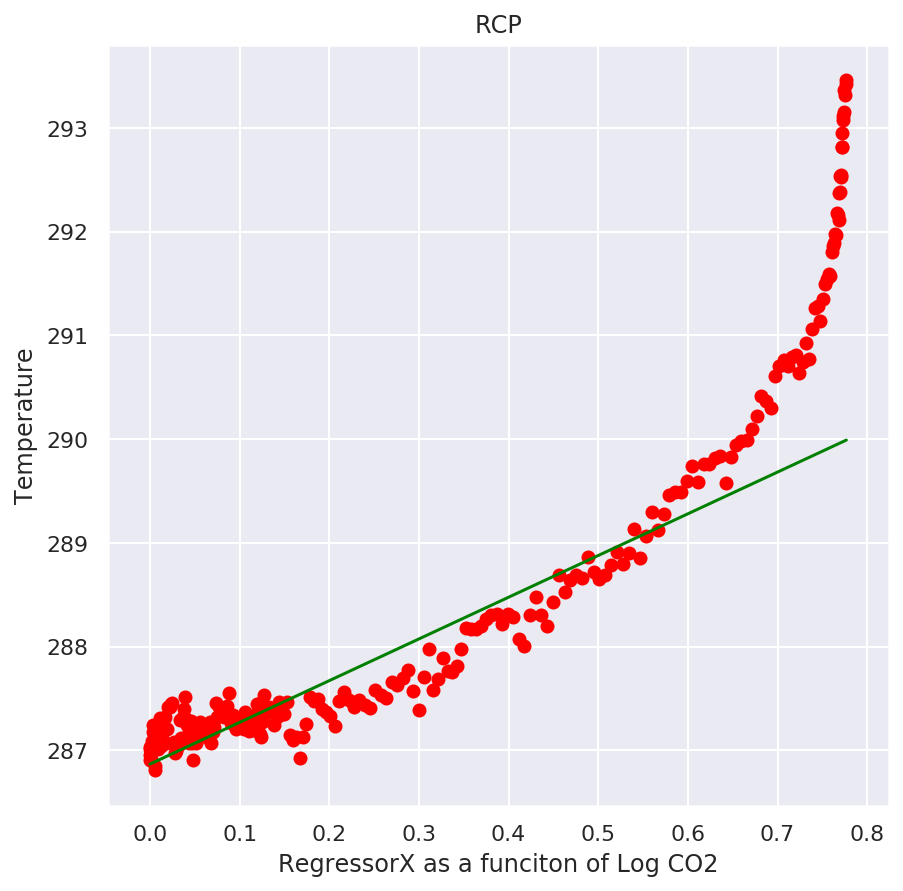

Test set RMSE of dt: 0.92


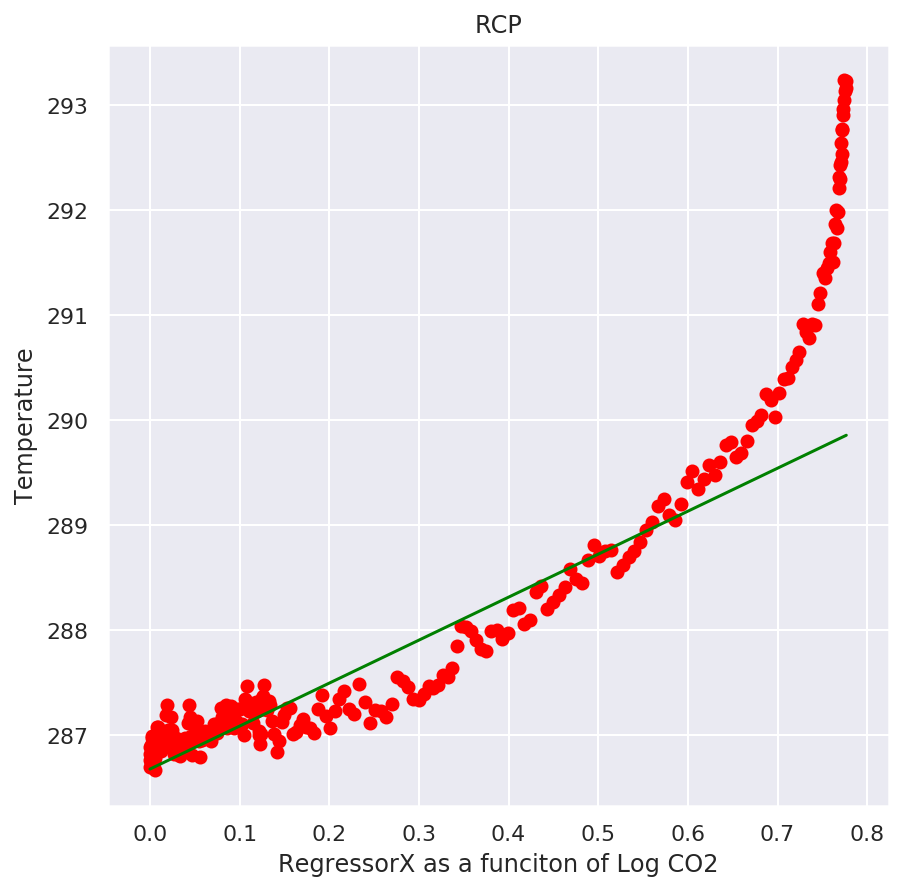

Test set RMSE of dt: 0.94


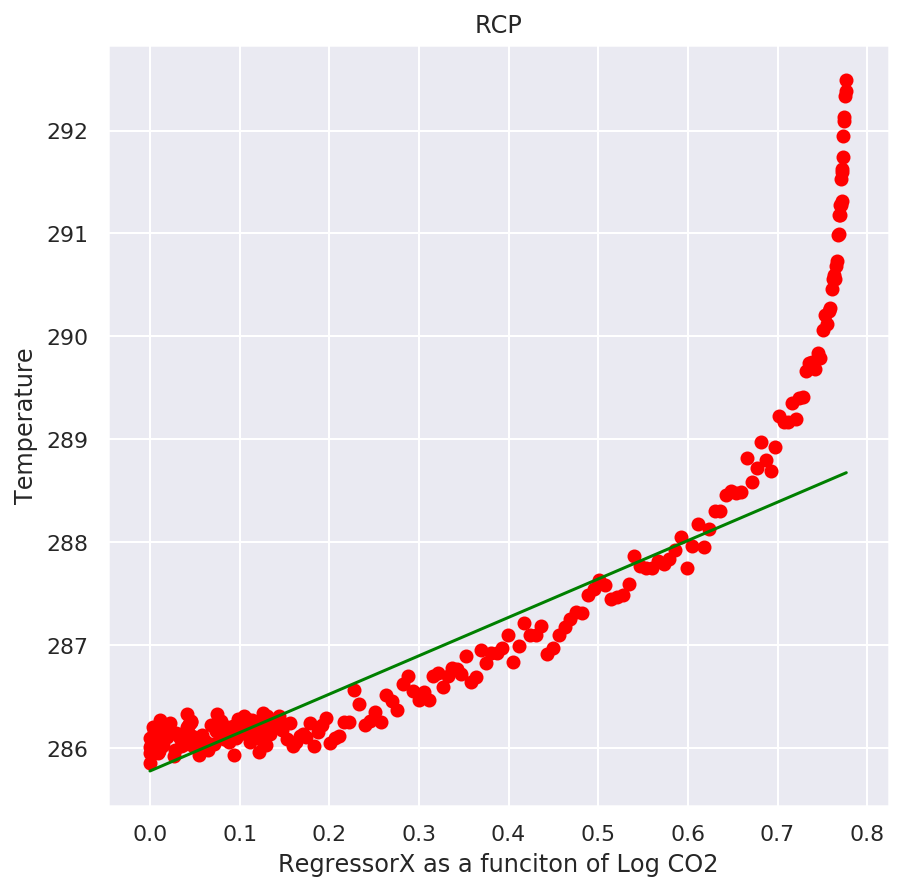

Test set RMSE of dt: 0.81


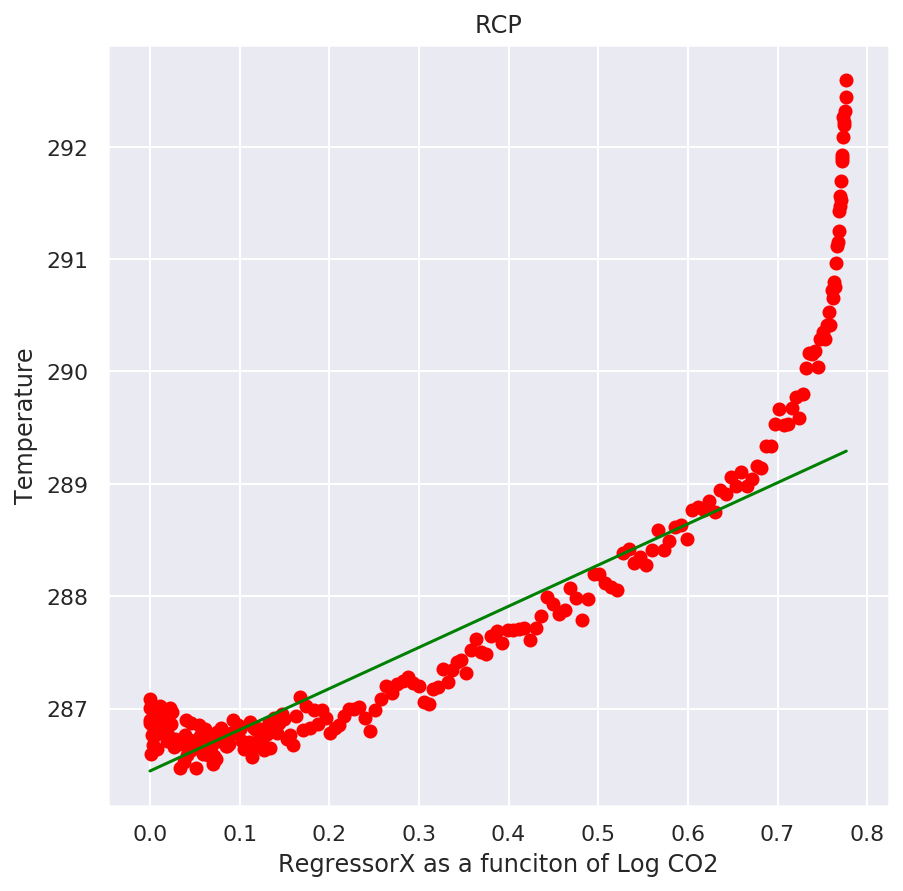

Test set RMSE of dt: 1.09


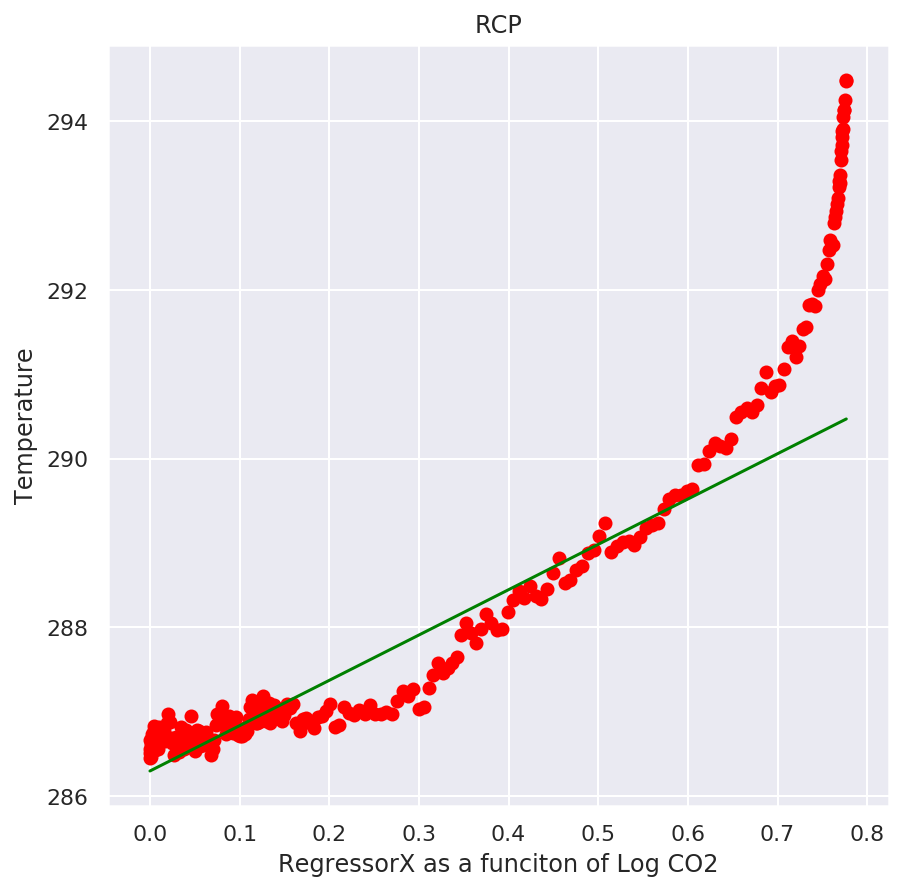

Test set RMSE of dt: 0.59


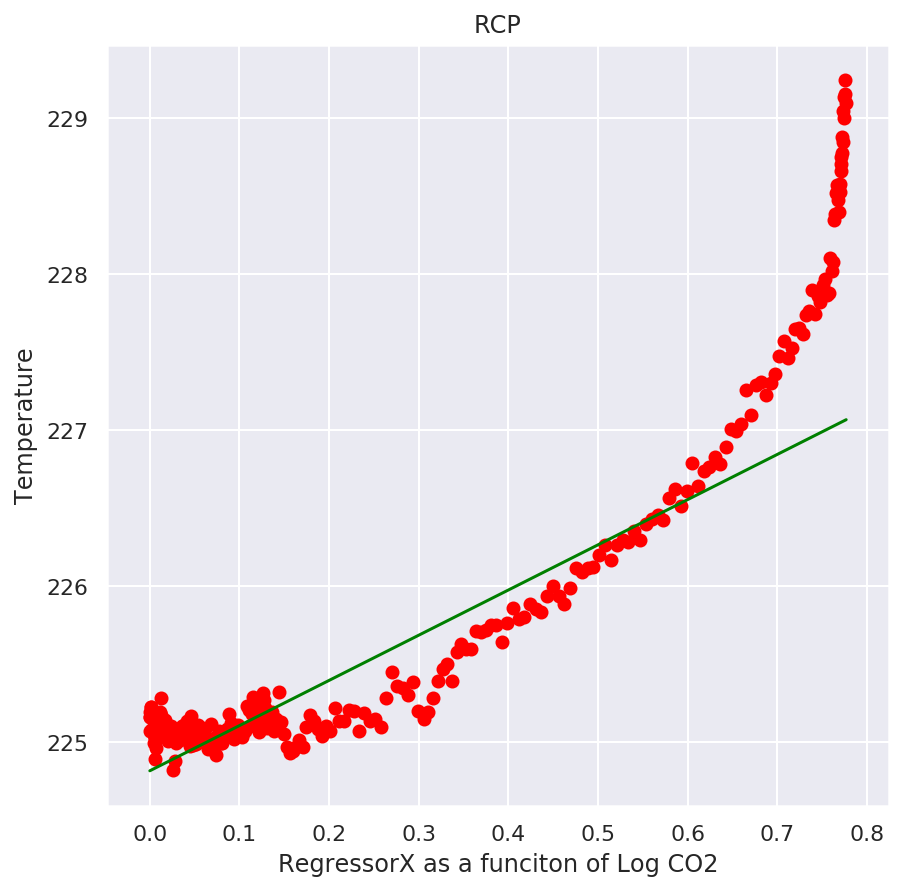

Test set RMSE of dt: 0.45


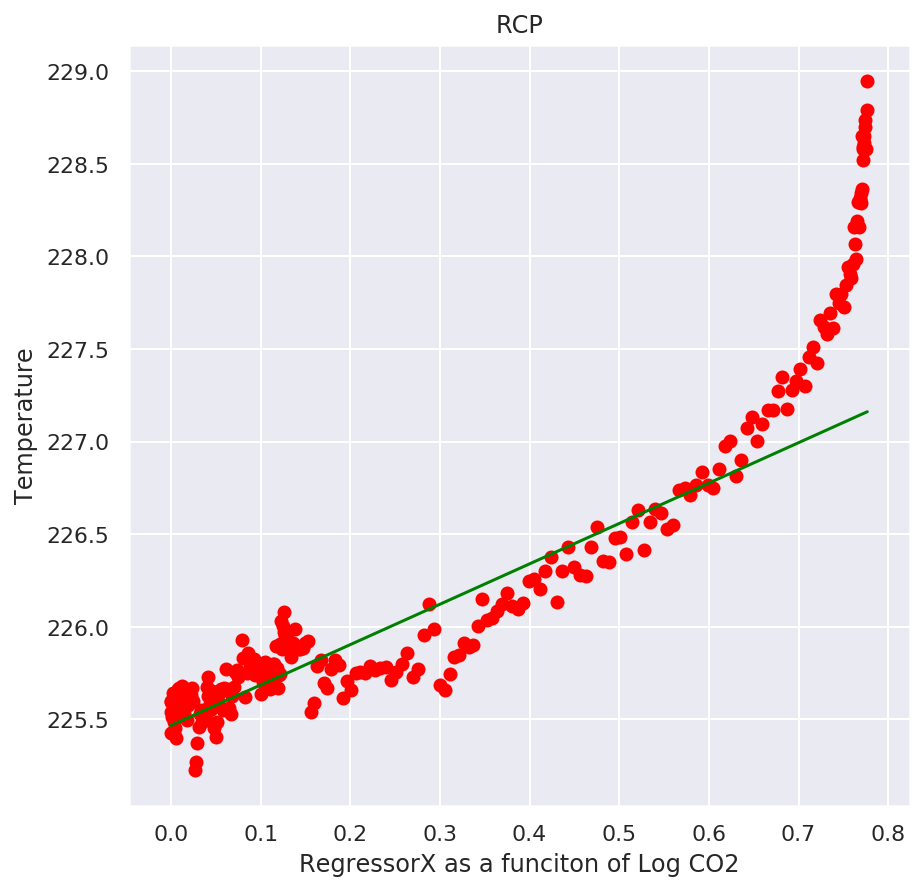

Test set RMSE of dt: 0.94


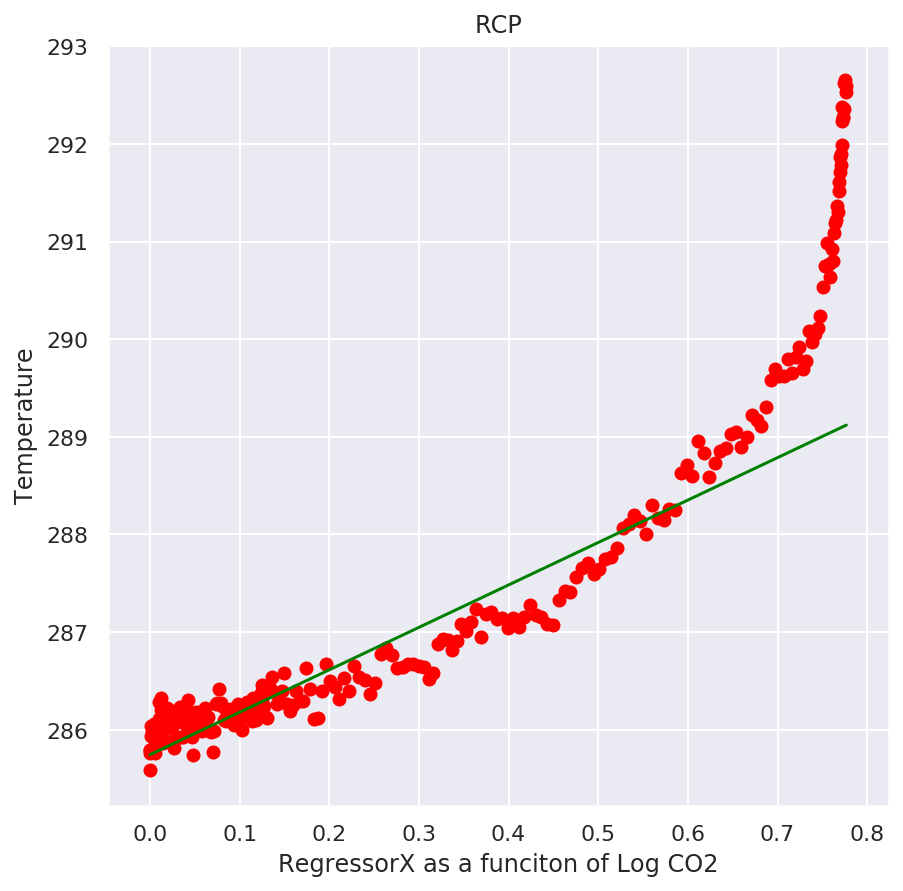

Test set RMSE of dt: 0.65


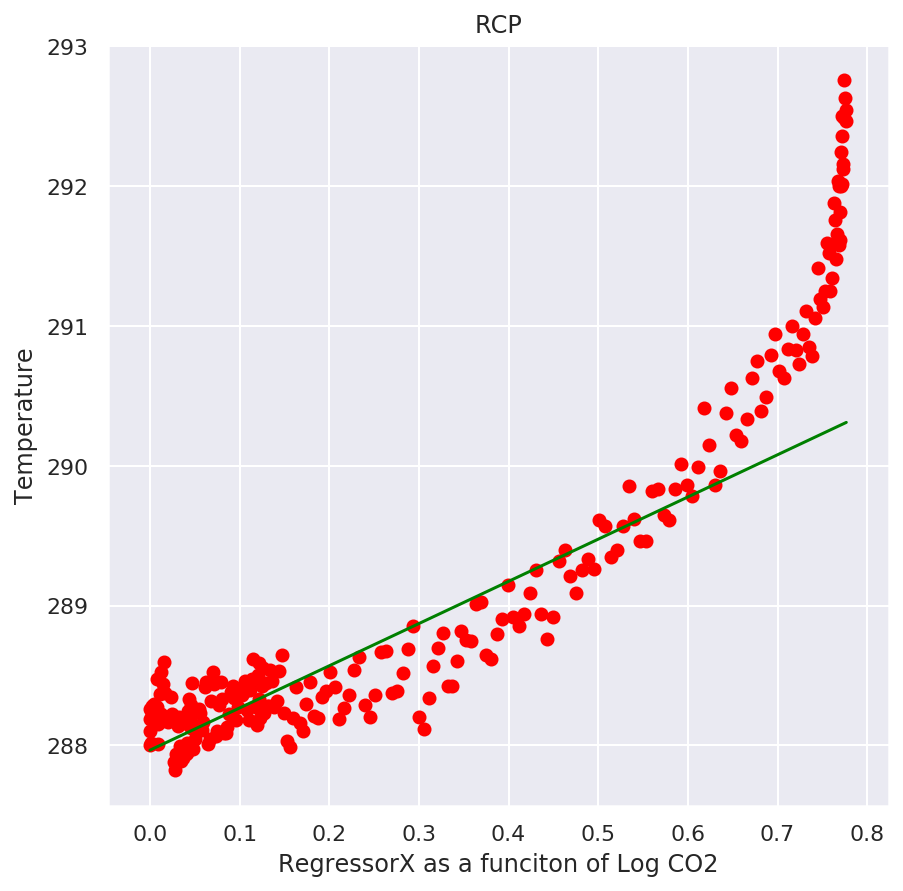

Test set RMSE of dt: 0.62


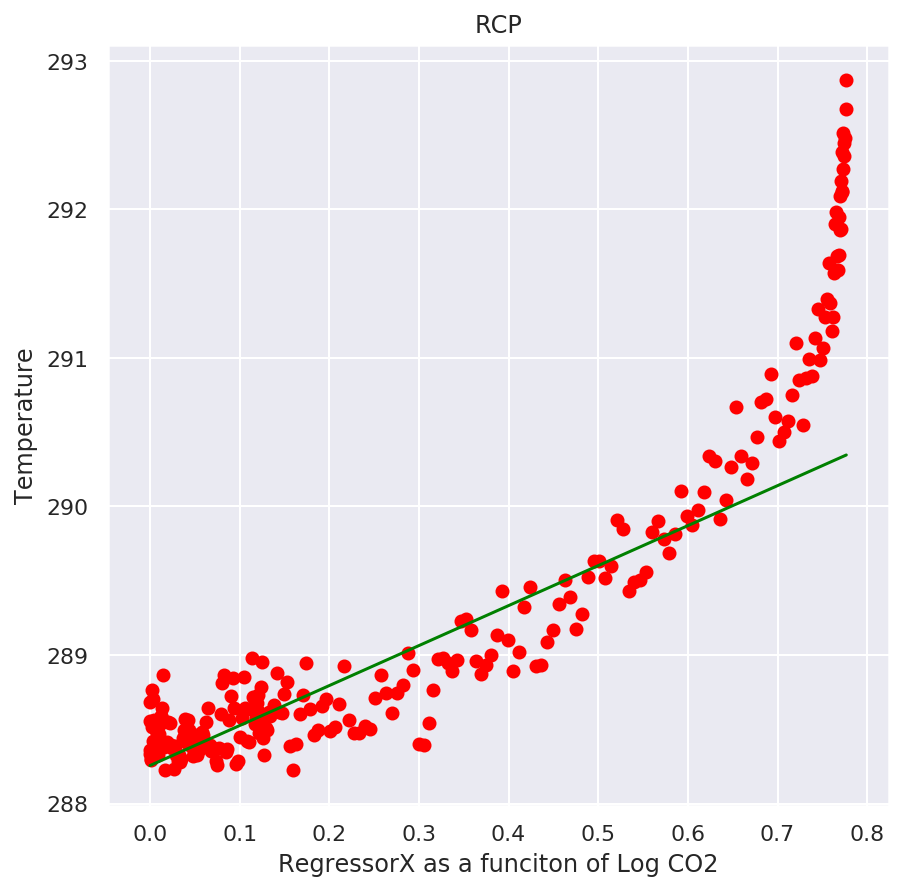

Test set RMSE of dt: 0.28


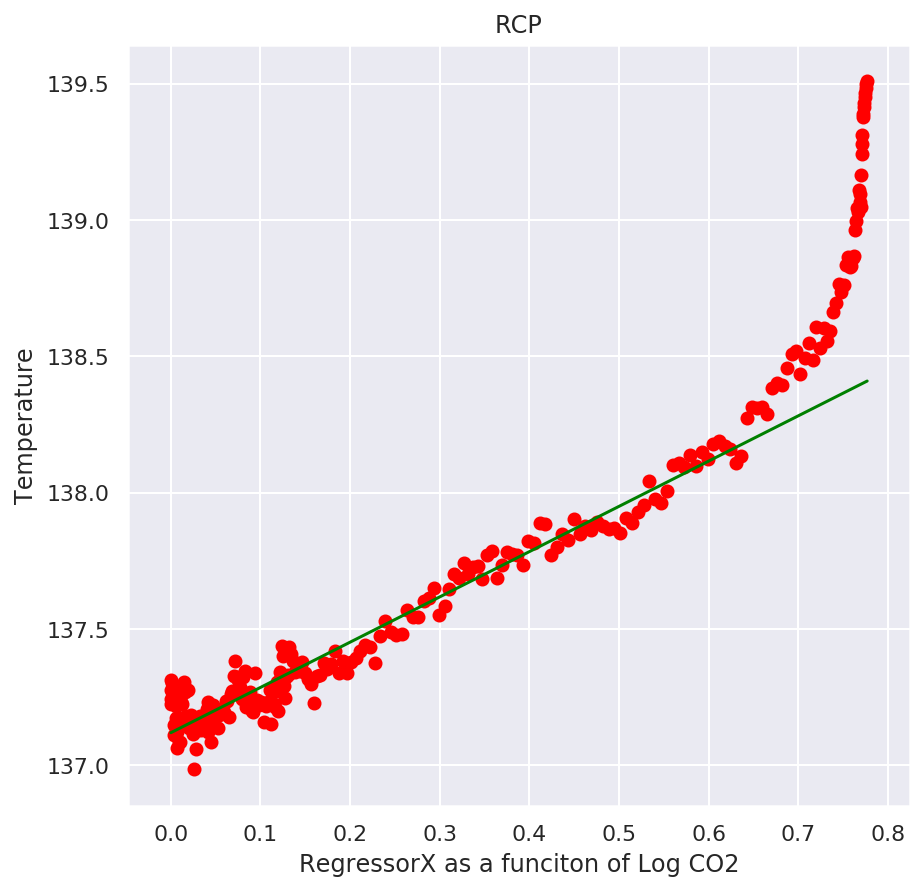

Test set RMSE of dt: 0.65


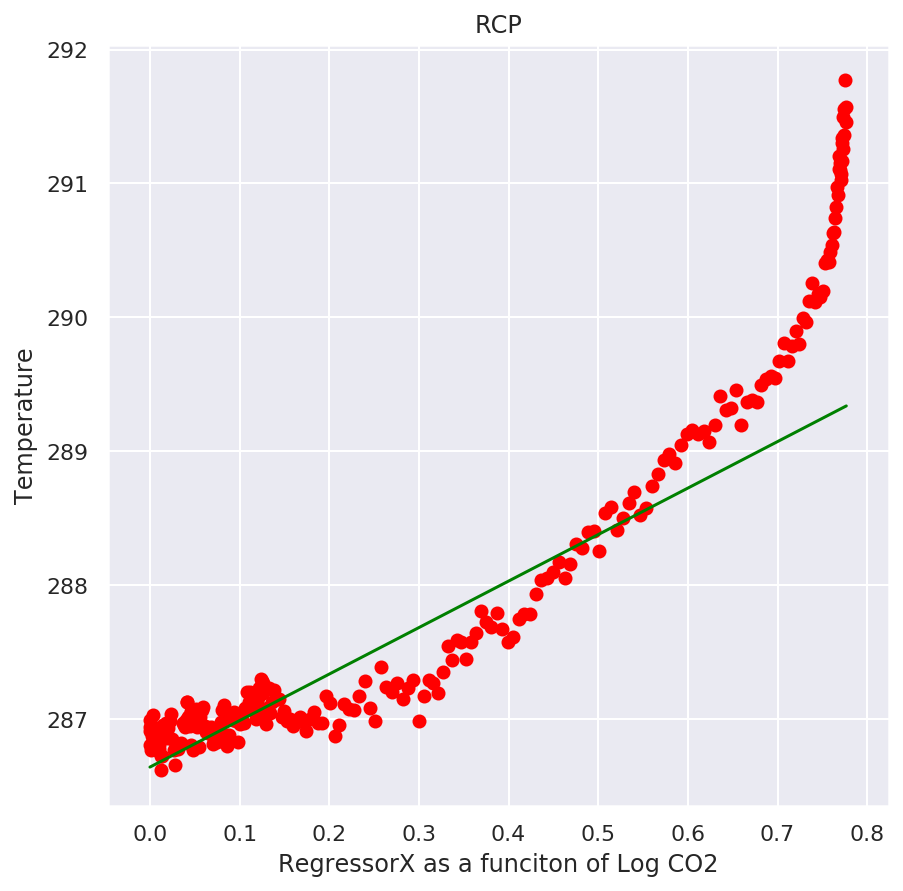

In [44]:
# PREDICTION FOR VARIOUS MODELS ON SSP585 PATHWAY
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
beta1=[]
beta0 = []
ser_no = 0
allT_mod = np.zeros(shape=(1250,4))
for model in ['CESM2','CESM2-WACCM','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR','MRI-ESM2-0']:
  for rcp in ['ssp585']:
    allT_mod = allT[allT.model== model]
    allT_mod = allT_mod[allT_mod.ssp==rcp]
    x_test = xnew[0:250,2]
    x_test = pd.DataFrame(x_r)
    y_test = allT_mod["mean_tas"]
    y_predict= fit_mod[ser_no].predict(x_test)
    # Compute mse_dt
    mse_dt = MSE(y_test, y_predict)
    # Compute rmse_dt
    rmse_dt = mse_dt**(1/2)
    # Print rmse_dt
    print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
    plt.scatter(x_test, y_test, color = "red")
    plt.plot(x_test, y_predict, color = "green")
    plt.title("RCP")
    plt.xlabel("RegressorX as a funciton of Log CO2")
    plt.ylabel("Temperature")
    plt.show()
    ser_no +=1  

Test set RMSE of dt: 0.31
Test set RMSE of dt: 0.28
Test set RMSE of dt: 0.30
Test set RMSE of dt: 0.35
Test set RMSE of dt: 0.46


ValueError: ignored

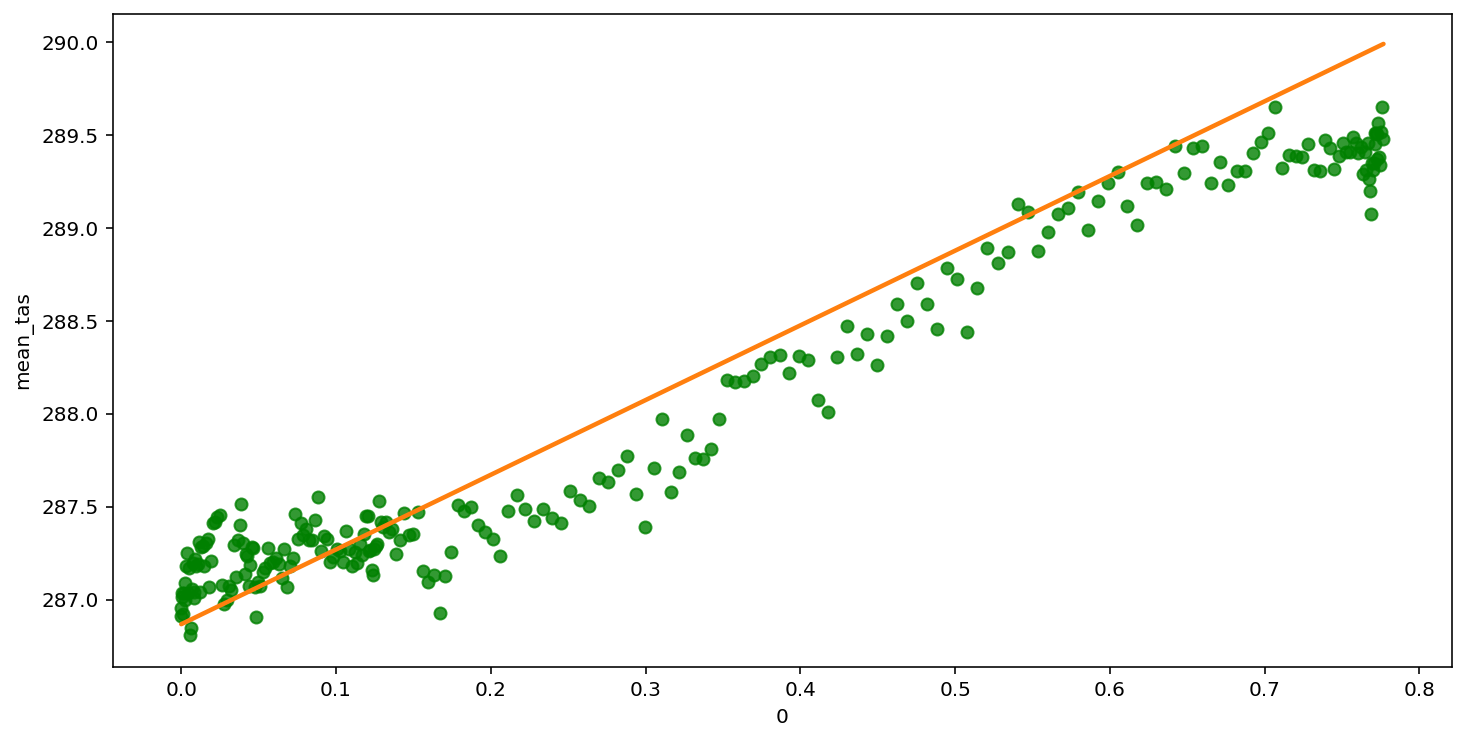

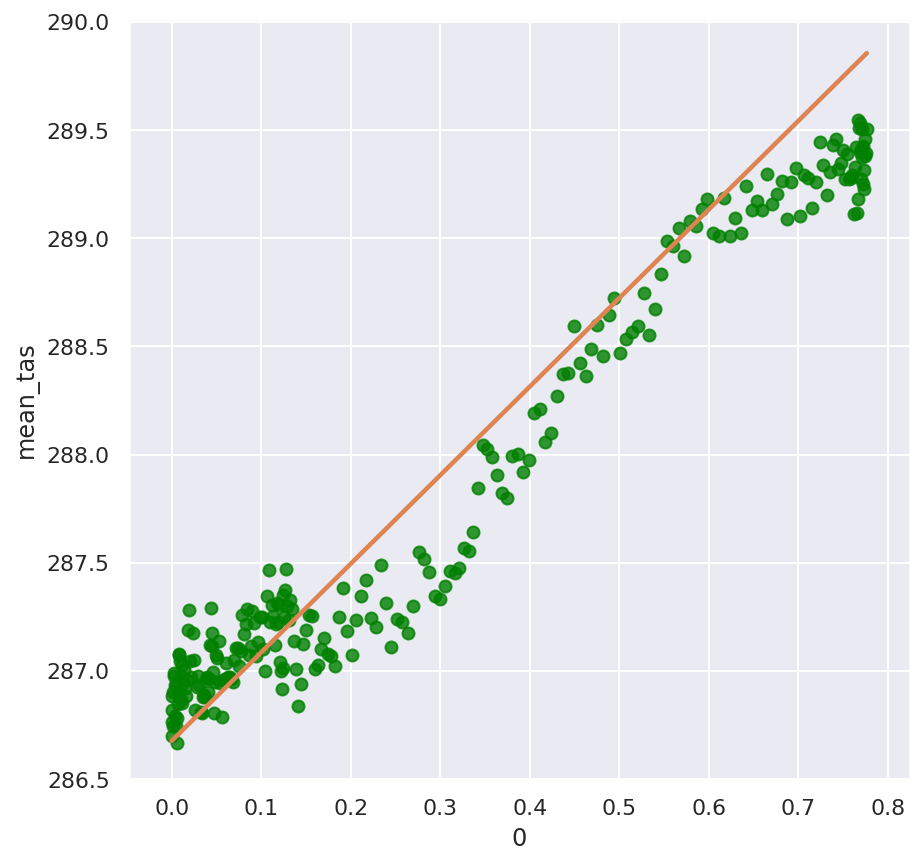

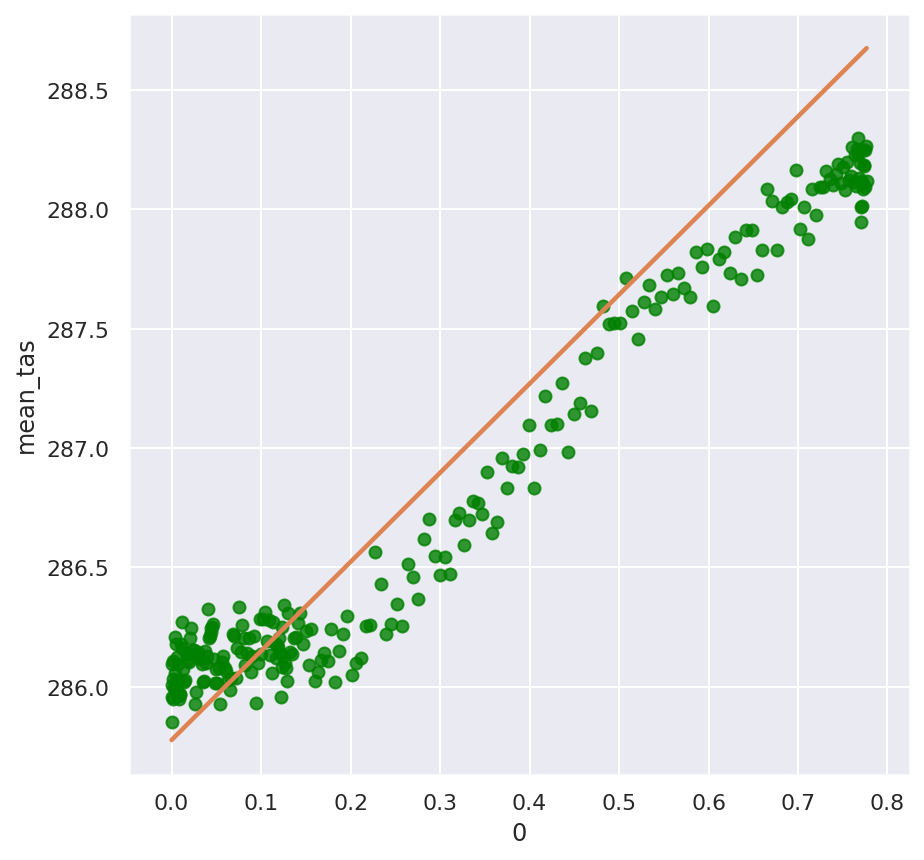

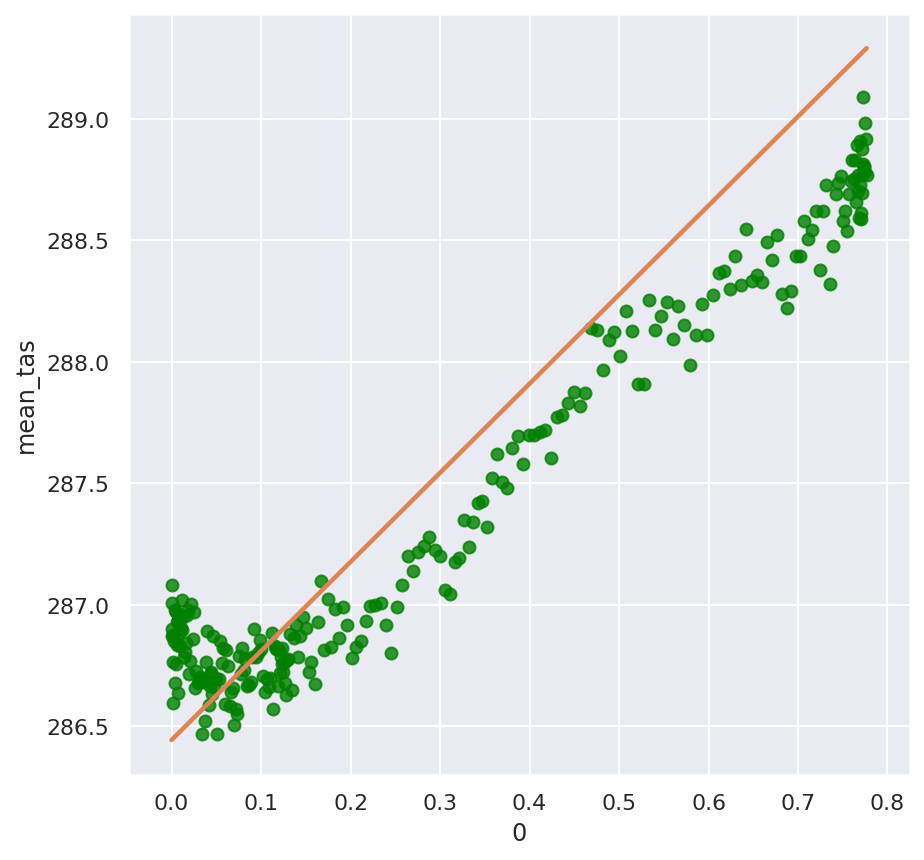

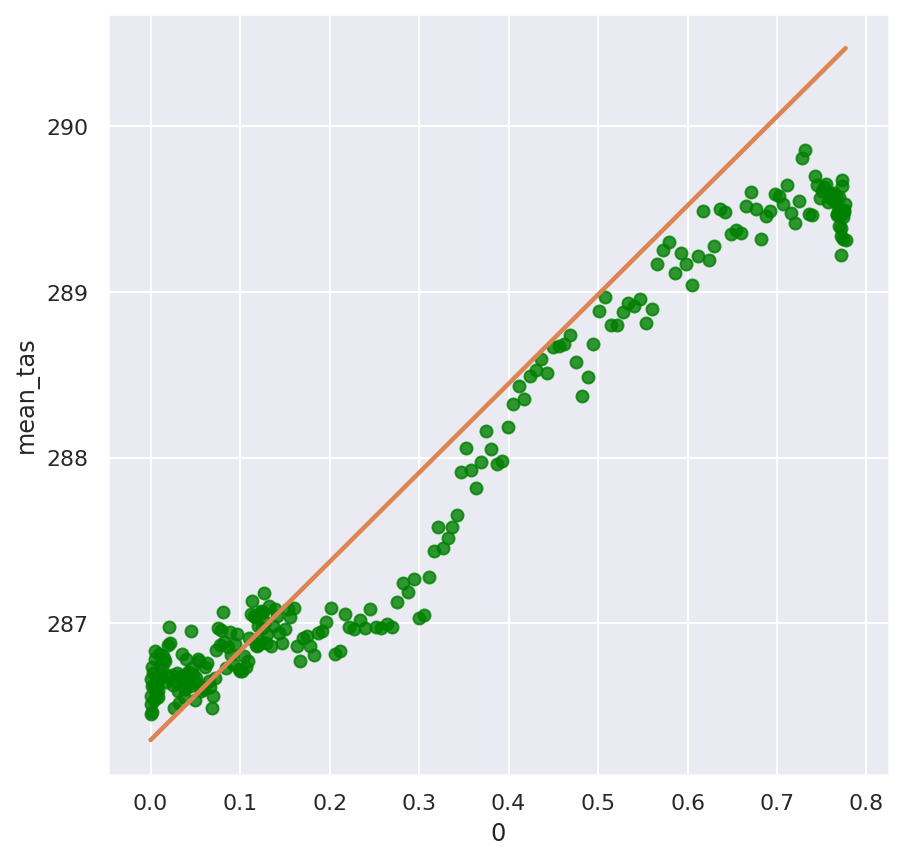

In [40]:
#PREDICTION FOR VARIOUS MODEL ON SSP 126 PATHWAY
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
beta1=[]
beta0 = []
ser_no = 0
allT_mod = np.zeros(shape=(1250,4))
for model in ['CESM2','CESM2-WACCM','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','GFDL-CM4','GFDL-ESM4','IPSL-CM6A-LR','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR','MRI-ESM2-0']:
  for rcp in ['ssp126']:
    allT_mod = allT[allT.model== model]
    allT_mod = allT_mod[allT_mod.ssp==rcp]
    x_test = xnew[0:250,1]
    x_test = pd.DataFrame(x_r)
    y_test = allT_mod["mean_tas"]
    y_predict= fit_mod[ser_no].predict(x_test)
    
    # Compute mse_dt
    mse_dt = MSE(y_test, y_predict)
    # Compute rmse_dt
    rmse_dt = mse_dt**(1/2)
    # Print rmse_dt
    print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
    fig, ax = plt.subplots()
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(7, 7)})
    sns.regplot(x=x_test, y=y_test, fit_reg=False, ax=ax,scatter_kws={"color": "green"});
    sns.regplot(x=x_test, y=y_predict,scatter=False, ax=ax, scatter_kws={"color": "green"});
    ser_no +=1 

## For CMIP-5 data on google cloud

In [0]:
# Load array of avaible models
df = pd.read_csv('https://storage.googleapis.com/cmip6/pangeo-cmip5.csv')
df_tas = df.query("activity_id=='CMIP5' & table_id == 'Amon' & variable_id == 'tas'")
models = df_tas.source_id.unique()
models


## To search for CMIP-5 or CMIP-6 data on ESGF (for

In [0]:
conn = SearchConnection('http://esgf-index1.ceda.ac.uk/esg-search', distrib=True)

In [0]:
ctx = conn.new_context(
    project='CMIP5',
    experiment='rcp45',
    model='HadCM3',
    ensemble='r1i1p1',
    time_frequency='mon',
    realm='atmos',
    data_node='esgf-data1.ceda.ac.uk',
    )
ctx.hit_count

result = ctx.search()[0]
files = result.file_context().search()

In [0]:
ds = xr.open_dataset(tasmax_url, chunks={'time': 120})
ds

In [0]:
ctx = conn.new_context(
    project = 'CMIP6',
    experiment_id = 'ssp585',
    variable = 'tas',
    frequency = 'mon',
    data_node='esgf-data3.ceda.ac.uk')

result = ctx.search()[0]
files = result.file_context().search()
for file in files:
    print(file.opendap_url)

http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r2i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_ssp585_r2i1p2f1_gn_201501-210012.nc


In [0]:
ctx = conn.new_context(
    project='CMIP6',
    experiment_id='ssp585',
    variable='tas',
    frequency='mon')

result = ctx.search()

AttributeError: ignored

In [0]:
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})
ds

In [0]:
#GEOMIP data

ctx = conn.new_context(
    experiment='G4cdnc',
    realm='atmos',
    data_node='esgf-data1.ceda.ac.uk',
    )
ctx.hit_count
result = ctx.search()[0]
files = result.file_context().search()
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})
ds